<a href="https://www.kaggle.com/haihla/maternal-health-risk-analysis-and-classification?scriptVersionId=84519556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv


In [2]:
df = pd.read_csv('/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv')

In [3]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.shape

(1014, 7)

In [6]:
df.count()

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
RiskLevel      1014
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


<h1>Exploratory Data Analysis</h1>

<Figure size 2000x1600 with 0 Axes>

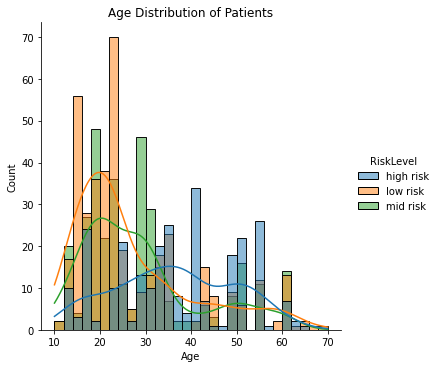

<Figure size 2000x1600 with 0 Axes>

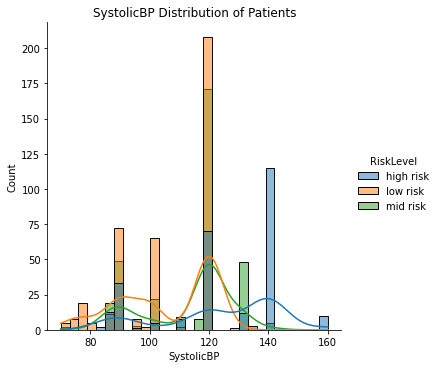

<Figure size 2000x1600 with 0 Axes>

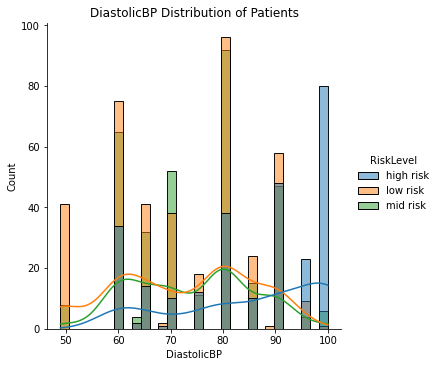

<Figure size 2000x1600 with 0 Axes>

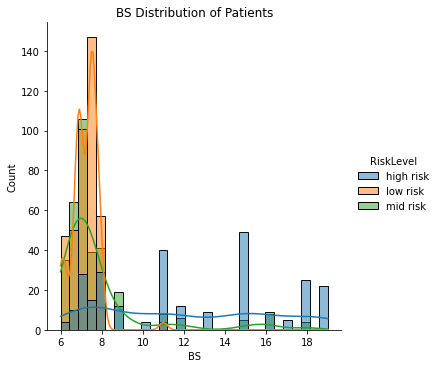

<Figure size 2000x1600 with 0 Axes>

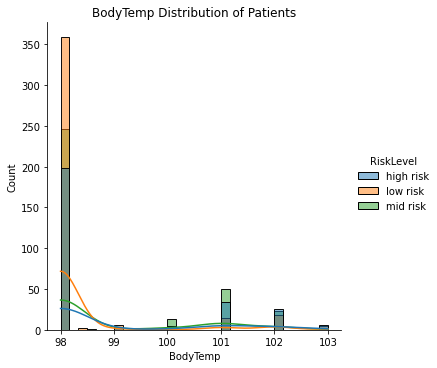

<Figure size 2000x1600 with 0 Axes>

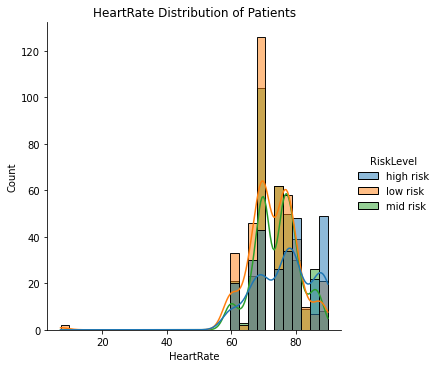

In [8]:
columns = df.columns[:len(df.columns) - 1]
for column in columns:
    plt.figure(figsize=(10,8), dpi=200)
    sns.displot(data=df, x=str(column), kde=True, hue="RiskLevel", bins=30).set(title="{} Distribution of Patients".format(str(column)))
    plt.show()


[Text(0.5, 1.0, 'Number Of Patients In Each Risk Category')]

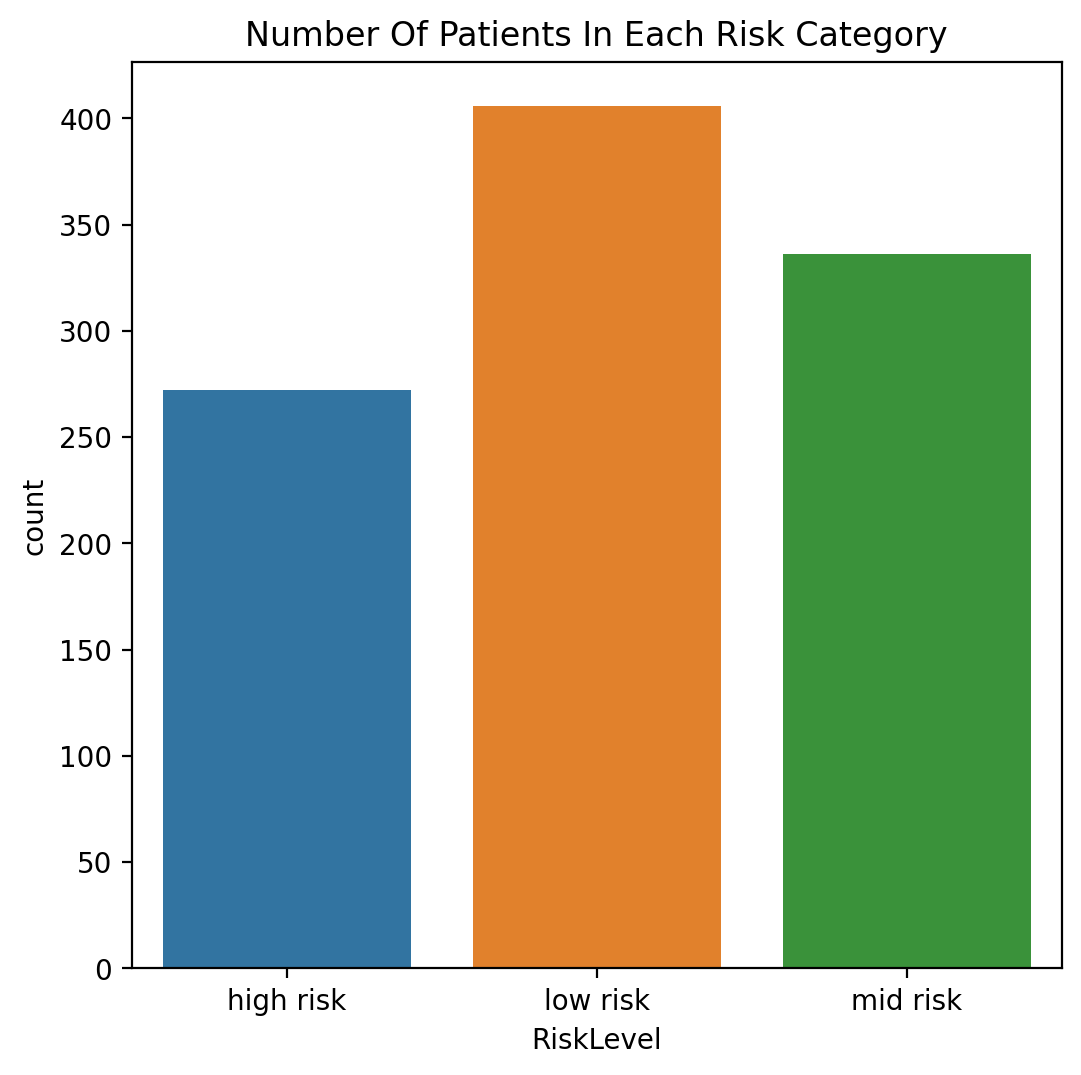

In [9]:
plt.figure(figsize=(6,6), dpi=200)
sns.countplot(data=df, x="RiskLevel").set(title="Number Of Patients In Each Risk Category")

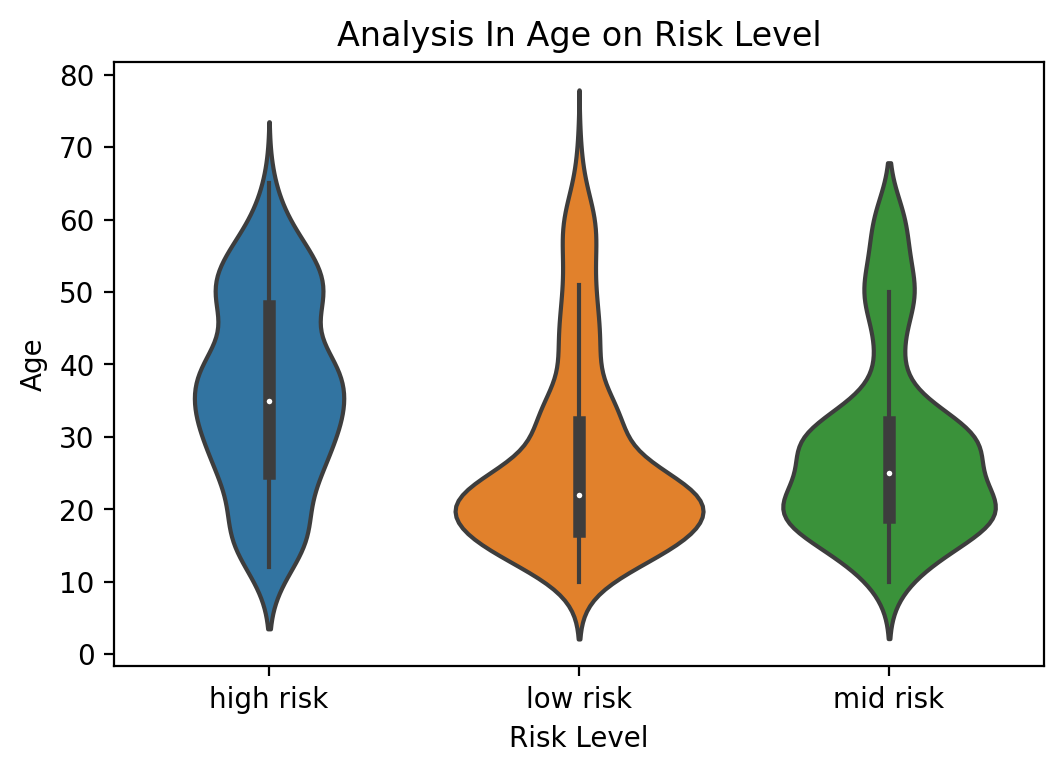

In [10]:
fig = plt.figure(figsize=(6,4), dpi=200)
sns.violinplot(x="RiskLevel", y="Age", data=df).set(title="Analysis In Age on Risk Level", xlabel="Risk Level")
plt.show()

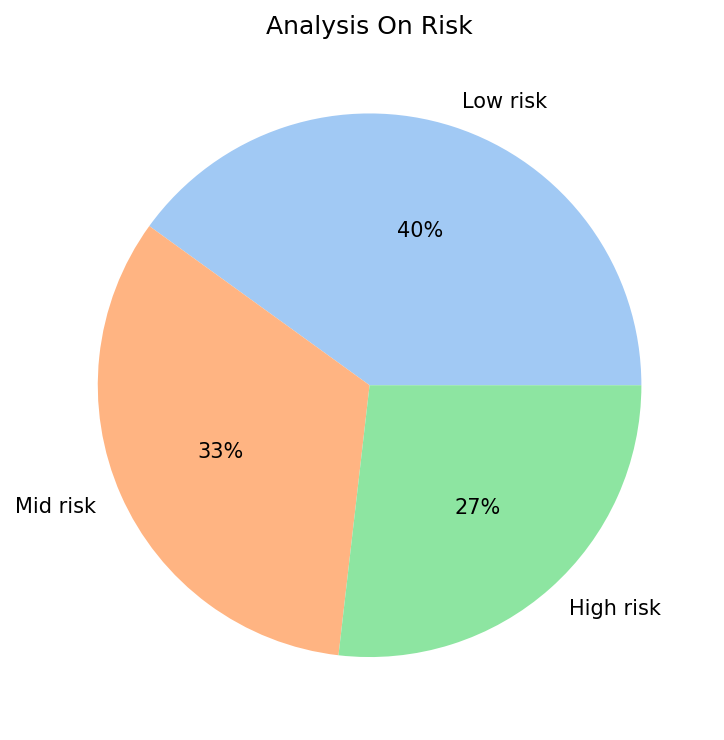

In [11]:
plt.figure(figsize=(6,6), dpi=150)
labels = ['Low risk', 'Mid risk', 'High risk']
low_risk = df[df['RiskLevel'] == 'low risk']
mid_risk = df[df['RiskLevel'] == 'mid risk']
high_risk = df[df['RiskLevel'] == 'high risk']
data = [len(low_risk), len(mid_risk), len(high_risk)]
colors = sns.color_palette('pastel')[0:5]
fig = plt.pie(x=data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Analysis On Risk')
plt.show()

<Figure size 2000x1600 with 0 Axes>

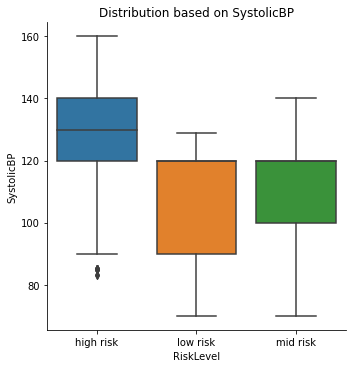

In [12]:
plt.figure(figsize=(10, 8), dpi=200)
sns.catplot(x="RiskLevel", y="SystolicBP", data=df, kind="box").set(title="Distribution based on SystolicBP")
plt.show()

<Figure size 2000x1600 with 0 Axes>

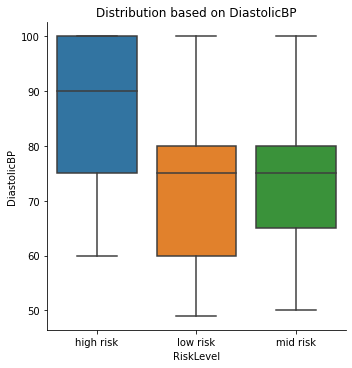

In [13]:
plt.figure(figsize=(10, 8), dpi=200)
sns.catplot(x="RiskLevel", y="DiastolicBP", data=df, kind="box").set(title="Distribution based on DiastolicBP")
plt.show()

Heatmap

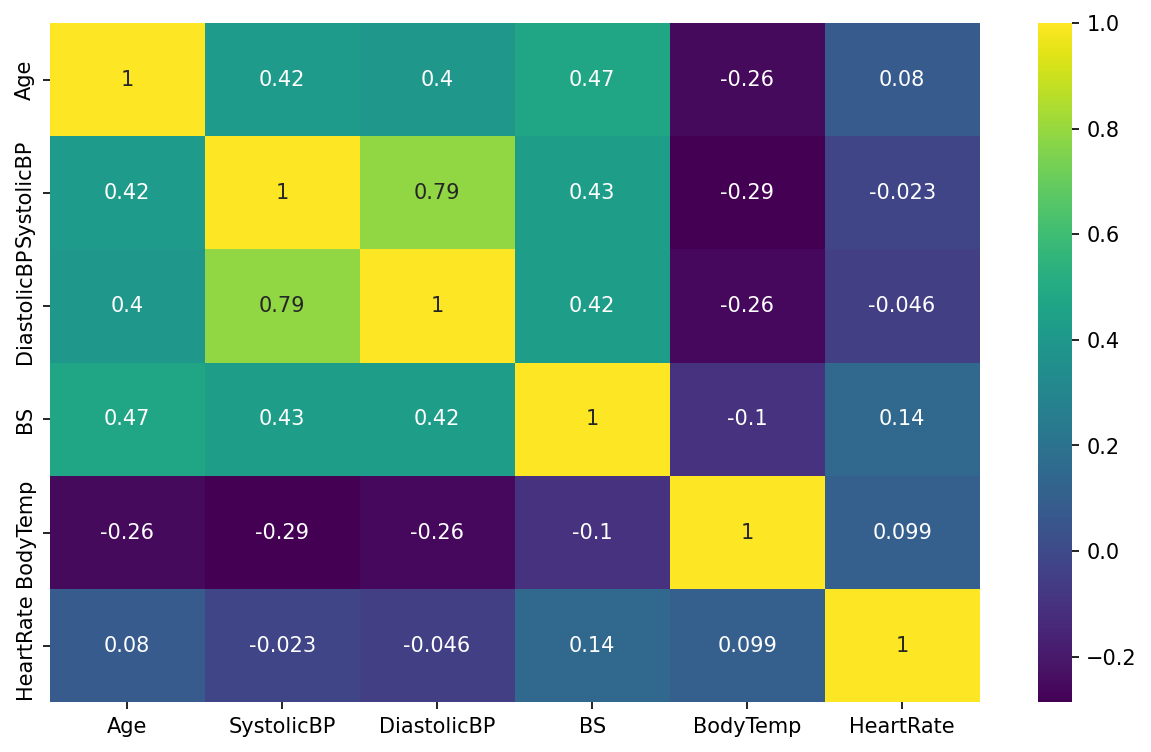

In [14]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.show()

Pairplot

<Figure size 1200x800 with 0 Axes>

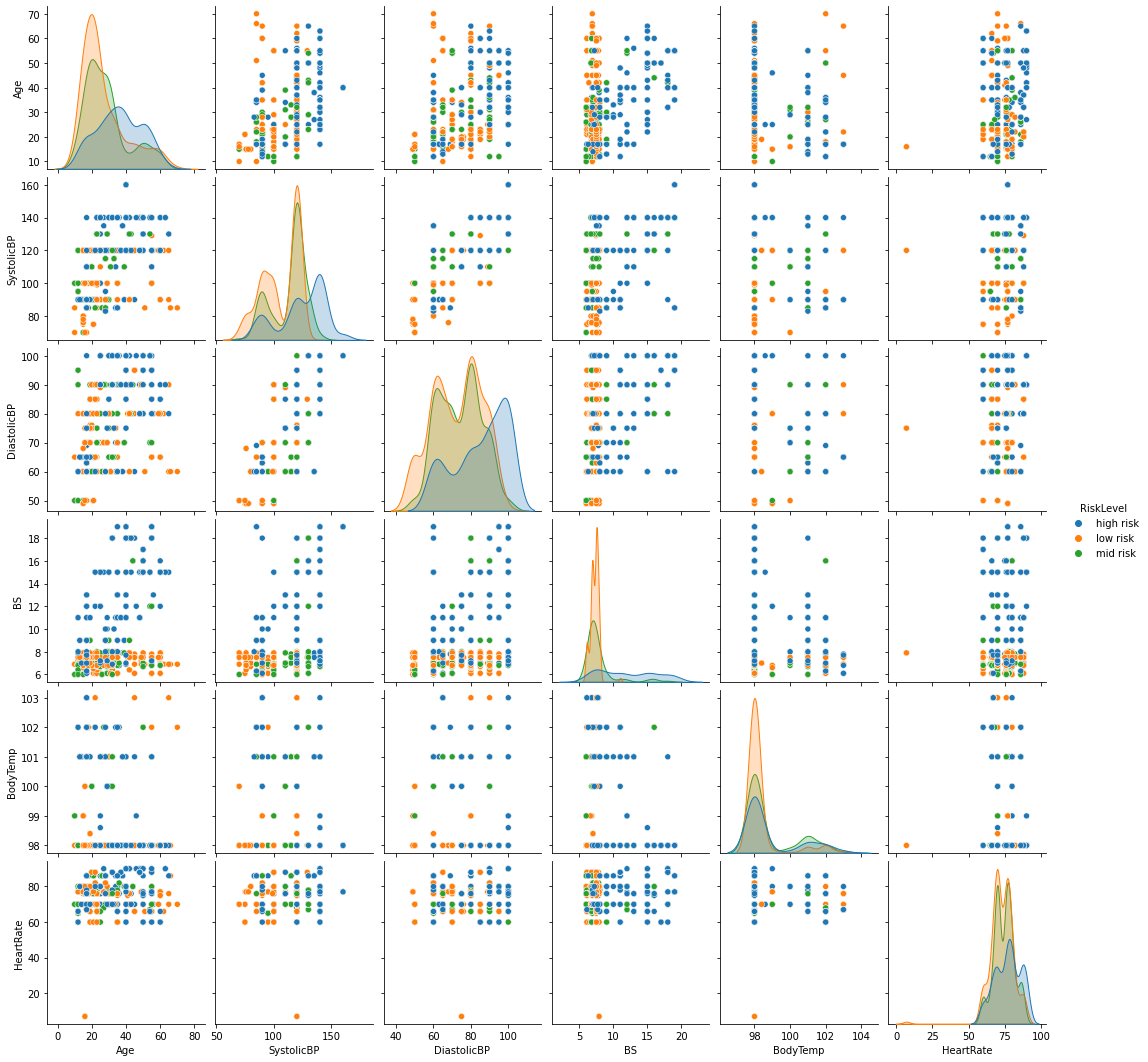

In [15]:
plt.figure(dpi=200)
sns.pairplot(df, hue='RiskLevel')
plt.show()

ROC Curve Plotting Function

In [16]:
from sklearn.metrics import roc_curve, auc

In [17]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Data Modelling

In [18]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


<h2>Train test split</h2>

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop("RiskLevel", axis=1)
y = df['RiskLevel']
accuracy_list = []

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h1>Random Forest Classification<h1>

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfm = RandomForestClassifier()

In [24]:
rfm.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
rfm_pred = rfm.predict(X_test)

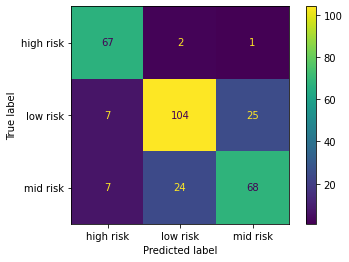

In [26]:
plot_confusion_matrix(rfm, X_test, y_test)

In [27]:
print(classification_report(y_test, rfm_pred))

              precision    recall  f1-score   support

   high risk       0.83      0.96      0.89        70
    low risk       0.80      0.76      0.78       136
    mid risk       0.72      0.69      0.70        99

    accuracy                           0.78       305
   macro avg       0.78      0.80      0.79       305
weighted avg       0.78      0.78      0.78       305



In [28]:
rfm_acc = accuracy_score(y_test, rfm_pred)
accuracy_list.append(rfm_acc * 100)

<h1>K Nearest Neighbor Classifier</h1>

In [29]:
from sklearn.neighbors import KNeighborsClassifier

Scale data

In [30]:
scaler = StandardScaler()

In [31]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [34]:
knn_pred = knn.predict(scaled_X_test)

In [35]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

   high risk       0.86      0.87      0.87        70
    low risk       0.83      0.79      0.81       136
    mid risk       0.73      0.77      0.75        99

    accuracy                           0.80       305
   macro avg       0.81      0.81      0.81       305
weighted avg       0.80      0.80      0.80       305



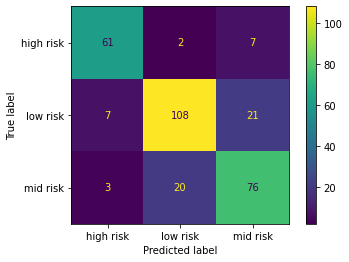

In [36]:
plot_confusion_matrix(knn, scaled_X_test, y_test)

In [37]:
knn_acc = accuracy_score(y_test, knn_pred)

In [38]:
accuracy_list.append(knn_acc * 100)

<h1>Logistic Regression Multiclass Classification</h1>

Scale Data

In [39]:
scaler = StandardScaler()

In [40]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegressionCV

In [42]:
lg = LogisticRegressionCV()

In [43]:
lg.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [44]:
lg_pred = lg.predict(scaled_X_test)

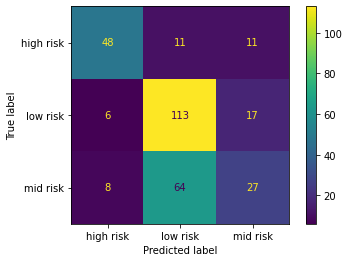

In [45]:
plot_confusion_matrix(lg, scaled_X_test, y_test)

In [46]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

   high risk       0.77      0.69      0.73        70
    low risk       0.60      0.83      0.70       136
    mid risk       0.49      0.27      0.35        99

    accuracy                           0.62       305
   macro avg       0.62      0.60      0.59       305
weighted avg       0.61      0.62      0.59       305



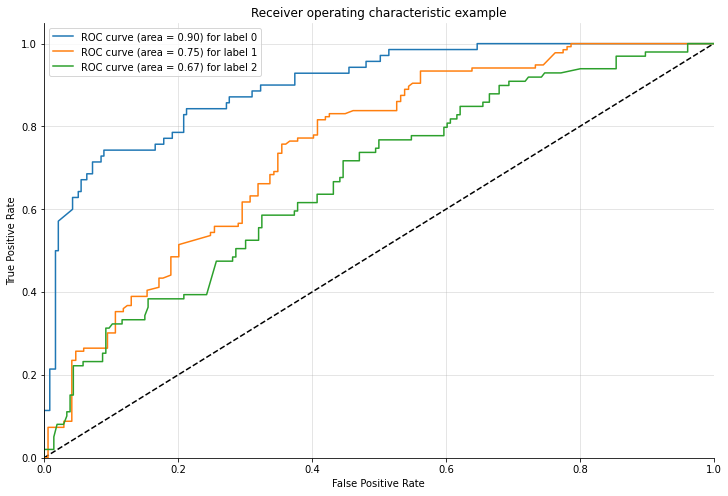

In [47]:
plot_multiclass_roc(lg, scaled_X_test, y_test, n_classes = 3, figsize=(12,8))

In [48]:
lg_acc = accuracy_score(y_test, lg_pred)
accuracy_list.append(lg_acc * 100)

<h1>Support Vector Machine Classification</h1>

In [49]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [50]:
from sklearn.svm import SVC

In [51]:
svc = SVC(decision_function_shape='ovo', class_weight='balanced')

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(svc, param_grid)

In [54]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced',
                           decision_function_shape='ovo'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [55]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale'}

In [56]:
svc_pred = grid.predict(scaled_X_test)

In [57]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

   high risk       0.74      0.87      0.80        70
    low risk       0.68      0.84      0.75       136
    mid risk       0.62      0.34      0.44        99

    accuracy                           0.69       305
   macro avg       0.68      0.68      0.66       305
weighted avg       0.67      0.69      0.66       305



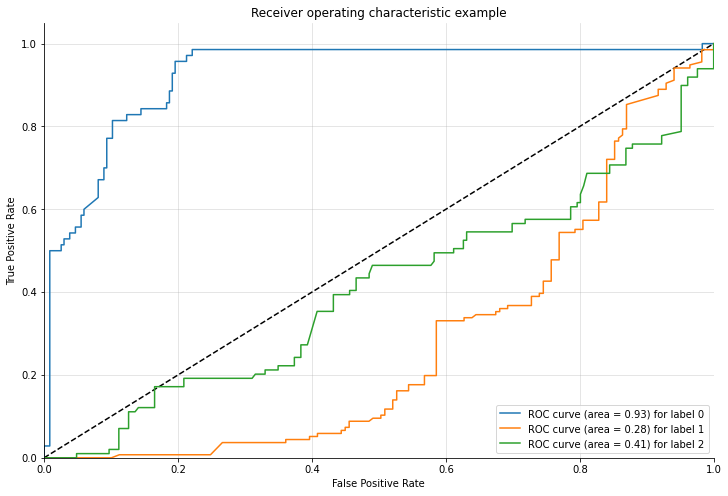

In [58]:
plot_multiclass_roc(grid, scaled_X_test, y_test, n_classes = 3, figsize=(12,8))

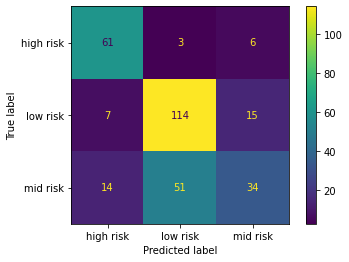

In [59]:
plot_confusion_matrix(grid, scaled_X_test, y_test)
plt.show()

In [60]:
svc_acc = accuracy_score(y_test, svc_pred)
accuracy_list.append(svc_acc * 100)

In [61]:
model_list = ["Random Forest", "KNearestNeighbors", "LogisticRegression","SVC"]

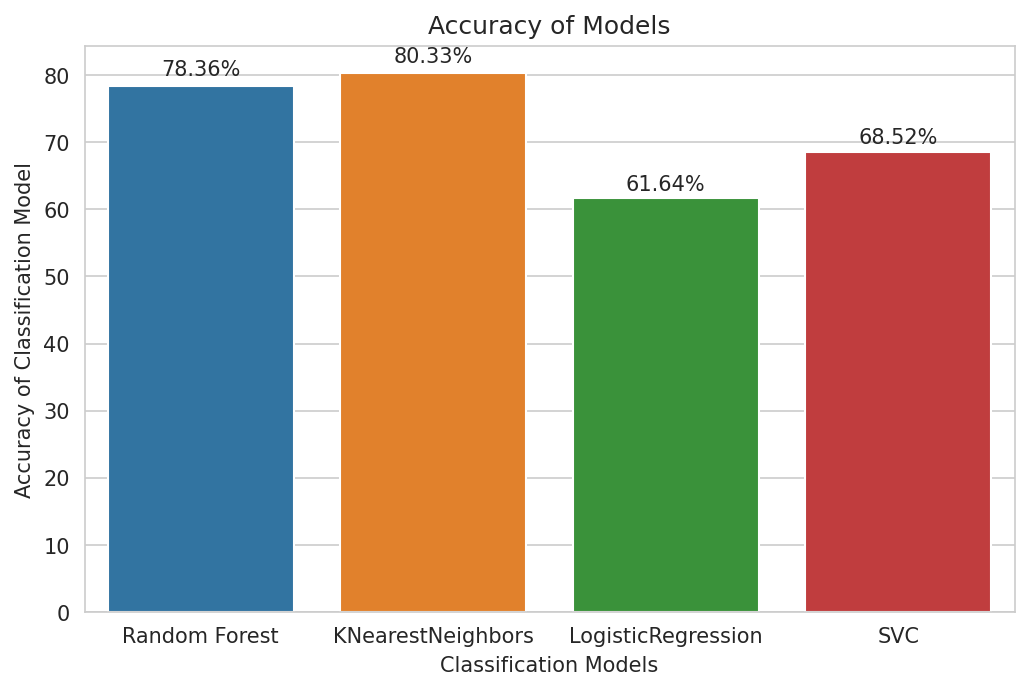

In [62]:
sns.set_style("whitegrid")
sns.color_palette("Paired")
plt.figure(figsize=(8,5), dpi=150)
ax = sns.barplot(x=model_list, y=accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()